<a href="https://colab.research.google.com/github/theyuvrajgupta/CategoricalDataAnalysis_Clustering/blob/main/TogetherForHer_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TogetherForHer Data Analysis

### In this analysis, we will use various logs obtained from the app users to derive meaningful interpretations to improve the user experience and understand the current experience of the app users.
### We will also look at some of the data collected from HealthMachine <sup>TM</sup> which contains various quizzes and PHI.

In [2]:
# install Kmodes for clustering

pip install kmodes

In [3]:
# Importing required libararies

import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from kmodes.kmodes import KModes
import warnings
warnings.filterwarnings("ignore") 

In [4]:
# Mounting Google drive to read data

drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


##### TRAFFIC SOURCE DATA EDA

In [5]:
# Data path from drive

trafficSource_data_path = "/gdrive/MyDrive/YUVRAJ GUPTA/Event Details/tfh_traffic_source_data.csv"

In [6]:
# Reading the data

trafficSource_df = pd.read_csv(trafficSource_data_path)

In [7]:
trafficSource_df.head(10)

,user_id,name,medium,source
0,30086,(direct),(none),(direct)
1,30733,(direct),(none),(direct)
2,31278,(direct),(none),(direct)
3,30372,(direct),(none),(direct)
4,30328,(direct),(none),(direct)
5,30059,(direct),(none),(direct)
6,30349,(direct),(none),(direct)
7,30017,(direct),(none),(direct)
8,30310,(direct),(none),(direct)
9,31059,NaN,organic,google-play


In [8]:
# Sanity checks on the dataframe

trafficSource_df.shape

(3793, 4)

In [9]:
trafficSource_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  3793 non-null   int64 
 1   name     2825 non-null   object
 2   medium   3713 non-null   object
 3   source   3745 non-null   object
dtypes: int64(1), object(3)
memory usage: 118.7+ KB


In [10]:
trafficSource_df.medium.unique()

array(['(none)', 'organic', 'cpc', nan, 'nivi6', 'Share', 'tfh_group'],
      dtype=object)

In [11]:
trafficSource_df.source.unique()

array(['(direct)', 'google-play', 'google', nan, 'adgebra', 'nivi6',
       'Branch', 'workplace'], dtype=object)

##### We will now perform some string manipulations for the
##### source data to make the entries more uniform

In [12]:
trafficSource_df.medium = trafficSource_df.medium.str.replace("(", "")

In [13]:
trafficSource_df.medium = trafficSource_df.medium.str.replace(")", "")

In [14]:
trafficSource_df.name = trafficSource_df.name.str.replace("(", "")

In [15]:
trafficSource_df.name = trafficSource_df.name.str.replace(")", "")

In [16]:
trafficSource_df.source = trafficSource_df.source.str.replace("(", "")

In [17]:
trafficSource_df.source = trafficSource_df.source.str.replace(")", "")

In [18]:
trafficSource_df.tail()

,user_id,name,medium,source
3788,33499,TFH - Google Ads - All of India,cpc,google
3789,34190,NaN,NaN,NaN
3790,35092,NaN,NaN,NaN
3791,35725,TFH - Google Ads - All of India,cpc,google
3792,35012,TFH - Google Ads - All of India,cpc,google


In [19]:
# Check for null values in the data

trafficSource_df.isnull().sum()

user_id      0
name       968
medium      80
source      48
dtype: int64

In [20]:
## Remove rows with all NaN values as they are not useful for analysis

trafficSource_df = trafficSource_df[trafficSource_df.name.notna() | trafficSource_df.medium.notna() | trafficSource_df.source.notna()]

In [21]:
trafficSource_df.tail()

,user_id,name,medium,source
3786,32679,TFH-Google Ads-1,cpc,google
3787,33021,TFH - Google Ads - All of India,cpc,google
3788,33499,TFH - Google Ads - All of India,cpc,google
3791,35725,TFH - Google Ads - All of India,cpc,google
3792,35012,TFH - Google Ads - All of India,cpc,google


In [ ]:
pathToSave = "/gdrive/MyDrive/Avegen_Data/tfh_traffic_source_data_cleaned.csv"

In [ ]:
# Save the cleaned data to CSV for visualisation in Power BI

trafficSource_df.to_csv(pathToSave)

#### VIDEO DATA EDA

In [ ]:
# Data path from drive

videoData_path = "/gdrive/MyDrive/YUVRAJ GUPTA/Form Submissions/tfh_video.xlsx"

In [ ]:
# Read the data

videoData_df = pd.read_excel(videoData_path)

In [ ]:
videoData_df.head()

,id,form_id,created_at,updated_at,is_draft,submitted_by_id,submitted_at,root_org_id,activity_id,target_id,target_type,readable_id,ext_ids,deleted_at,form_version,episode_of_care_id,source,video_id,video_title,is_completed,time_watched
0,107186,994,2020-06-22 08:08:38.281,2020-06-22 08:08:38.281,False,29963,2020-06-22 08:08:38.273,1140,NaN,256195,Patient,DKR-31H,{'hm_note_id': {}},NaN,1,NaN,health_machine,omEh3lIl0cs,डॉ. अश्विनी से जानिए गर्भावस्था में बवासीर से ...,NaN,8
1,105773,994,2020-06-18 07:15:54.204,2020-06-18 07:15:54.204,False,29956,2020-06-18 07:15:54.199,1140,NaN,255758,Patient,3LR-L42,{'hm_note_id': {}},NaN,1,NaN,health_machine,38L_iUyDJDg,गर्भावस्था में होनेवाले खिचाव के निशान को मिटा...,NaN,189
2,106151,994,2020-06-19 09:12:54.608,2020-06-19 09:12:54.608,False,29963,2020-06-19 09:12:54.592,1140,NaN,256195,Patient,GFJ-CBP,{'hm_note_id': {}},NaN,1,NaN,health_machine,b87d_vzghOU,समय से पहले डिलीवरी या प्रीमैच्योर डिलीवरी के ...,NaN,8
3,107189,994,2020-06-22 08:08:57.028,2020-06-22 08:08:57.028,False,29963,2020-06-22 08:08:57.022,1140,NaN,256195,Patient,NAM-Z3H,{'hm_note_id': {}},NaN,1,NaN,health_machine,4O5eOa_eIBk,"डॉ. शिल्पा कहती हैं, आयरन युक्त भोजन खाएं, अपन...",NaN,9
4,106162,994,2020-06-19 09:33:04.733,2020-06-19 09:33:04.733,False,29963,2020-06-19 09:33:04.726,1140,NaN,256195,Patient,7U8-HBK,{'hm_note_id': {}},NaN,1,NaN,health_machine,v3lS4LcWfiY,बच्चे को जन्म देने के तुरंत बाद गर्भधारण करने ...,NaN,5


In [ ]:
# There are a lot of columns that are irrelevant for analysis.
# Let's choose only the relevant columns to make the data cleaner
# and more concise.

col_list = ['id', 'video_title', 'is_completed', 'time_watched']

videoData_df = videoData_df[col_list]

In [ ]:
videoData_df.head()

,id,video_title,is_completed,time_watched
0,107186,डॉ. अश्विनी से जानिए गर्भावस्था में बवासीर से ...,NaN,8
1,105773,गर्भावस्था में होनेवाले खिचाव के निशान को मिटा...,NaN,189
2,106151,समय से पहले डिलीवरी या प्रीमैच्योर डिलीवरी के ...,NaN,8
3,107189,"डॉ. शिल्पा कहती हैं, आयरन युक्त भोजन खाएं, अपन...",NaN,9
4,106162,बच्चे को जन्म देने के तुरंत बाद गर्भधारण करने ...,NaN,5


In [ ]:
videoData_df.shape

(8913, 4)

In [ ]:
videoData_df.isnull().sum()

id                 0
video_title        0
is_completed    8913
time_watched       0
dtype: int64

In [ ]:
# Column 'is_completed' contains no data and can also be dropped

videoData_df = videoData_df.drop("is_completed", axis=1)

In [ ]:
videoData_df.head()

,id,video_title,time_watched
0,107186,डॉ. अश्विनी से जानिए गर्भावस्था में बवासीर से ...,8
1,105773,गर्भावस्था में होनेवाले खिचाव के निशान को मिटा...,189
2,106151,समय से पहले डिलीवरी या प्रीमैच्योर डिलीवरी के ...,8
3,107189,"डॉ. शिल्पा कहती हैं, आयरन युक्त भोजन खाएं, अपन...",9
4,106162,बच्चे को जन्म देने के तुरंत बाद गर्भधारण करने ...,5


In [ ]:
videoData_df.shape

(8913, 3)

##### We will build a simple popularity based recommendation system
##### to understand the watch patterns and provide smarter recommendations
##### to the users in the future.

In [ ]:
# Copy the relevant columns to a new dataframe

trend_df = videoData_df[['video_title', 'time_watched']].copy()

In [ ]:
trend_df.head()

,video_title,time_watched
0,डॉ. अश्विनी से जानिए गर्भावस्था में बवासीर से ...,8
1,गर्भावस्था में होनेवाले खिचाव के निशान को मिटा...,189
2,समय से पहले डिलीवरी या प्रीमैच्योर डिलीवरी के ...,8
3,"डॉ. शिल्पा कहती हैं, आयरन युक्त भोजन खाएं, अपन...",9
4,बच्चे को जन्म देने के तुरंत बाद गर्भधारण करने ...,5


In [ ]:
trend_df.columns

Index(['video_title', 'time_watched'], dtype='object')

In [ ]:
trend_df = pd.DataFrame(videoData_df.groupby('video_title')['time_watched'].count())

In [ ]:
trend_df = trend_df.reset_index()

In [ ]:
trend_df = trend_df.sort_values(by='time_watched', ascending=False)

In [ ]:
trend_df.head(10)

,video_title,time_watched
56,एपिड्यूरल का इंजेक्शन कब लेना चाहिए जानें डॉ. ...,270
68,गर्भावस्था के हर एक दिन का मेनू जानिए डॉ. शिल्...,250
118,डॉ. शिल्पा से जानिए तीसरी तिमाही में क्या खाना...,237
58,एपीसीओटॉमी का मतलब समझिए डॉ अश्विनी से|,221
127,"डॉ. शिल्पा से जानें, दूसरी तिमाही में शरीर को ...",217
132,दूसरी तिमाही में आपके आहार में क्या बदलाव आने ...,216
63,गर्भावस्था के दौरान कौन से वसा स्वस्थ होते हैं...,210
126,"डॉ. शिल्पा से जानें, दूसरी तिमाही में प्रोटीन ...",205
122,डॉ. शिल्पा से जानें गर्भावस्था के दौरान तरल पद...,205
109,डॉ. शिल्पा कहती हैं इन रेशेदार (फ़ाइब्रॅस) खाद...,204


#### These are the Top 10 most watched videos on the platform

In [ ]:
trend_df.tail(10)

,video_title,time_watched
143,शिशु के लिए स्तनपान यानि माँ का दूध पिने के फा...,2
115,"डॉ. शिल्पा कहते है, गर्भवस्था में खाएं स्वस्थ ...",2
55,उलटी और मीच -मीची से छुटकारा पाने के नुस्खे जा...,2
135,पैरों के दर्द से छुटकारा पाने के नुस्खे जानिएं...,2
39,Learn about false labour or Braxton Hicks from...,2
61,गर्भवस्था में क्या खाना चाहियें और क्या नहीं ज...,2
87,गर्भावस्था मैं सांस फूलने से बचाव के नुस्खे जा...,1
45,Prevent swelling of feet and legs with Dr. Ash...,1
90,डॉ अश्विनी कहती है की गर्भावस्था के दौरान आपके...,1
91,डॉ. अश्विनी आपको बताती हैं कि शिशु को जन्म देन...,1


#### These are the least watched videos on the platform

In [ ]:
# We will now save this data for further visualization in Power BI

pathToSave = "/gdrive/MyDrive/Avegen_Data/tfh_video_cleaned.csv"

In [ ]:
trend_df.to_csv(pathToSave)

#### EPIDURAL DATA EDA

In [22]:
# Data path from drive

epidural_data = "/gdrive/MyDrive/YUVRAJ GUPTA/Form Submissions/quiz_epidural.csv"

In [23]:
# Read the data

epidural_df = pd.read_csv(epidural_data)

In [24]:
epidural_df.head()

,id,form_code,root_org_id,created_at,updated_at,deleted_at,submitted_at,is_draft,submitted_by_id,activity_id,target_id,target_type,readable_id,episode_of_care_id,source,id-2,form_code-2,form_submission_id,table_code,row_number,field_name,field_option_id,id-3,form_code-3,table_code-2,field_name-2,field_order,field_text,field_value
0,195792,dm_form_1060_1,1140,2020-12-28 07:59:31.775104,2020-12-28 07:59:31.775104,NaN,2020-12-28 07:59:31.766257,False,30735,NaN,260525,Patient,CZK-SBB,NaN,health_machine,327882,dm_form_1060_1,195792,NaN,NaN,answered_correctly,4124,4124,dm_form_1060_1,dm_form_1060_1,answered_correctly,0,No,no
1,125192,dm_form_1060_1,1140,2020-08-22 08:50:37.544183,2020-08-22 08:50:37.544183,NaN,2020-08-22 08:50:37.535843,False,29960,NaN,256184,Patient,N9L-W5A,NaN,health_machine,243666,dm_form_1060_1,125192,NaN,NaN,epidural,4123,4123,dm_form_1060_1,dm_form_1060_1,epidural,1,Only in some deliveries,1
2,125192,dm_form_1060_1,1140,2020-08-22 08:50:37.544183,2020-08-22 08:50:37.544183,NaN,2020-08-22 08:50:37.535843,False,29960,NaN,256184,Patient,N9L-W5A,NaN,health_machine,243667,dm_form_1060_1,125192,NaN,NaN,answered_correctly,4124,4124,dm_form_1060_1,dm_form_1060_1,answered_correctly,0,No,no
3,126365,dm_form_1060_1,1140,2020-08-24 18:15:59.452925,2020-08-24 18:15:59.452925,NaN,2020-08-24 18:15:59.43375,False,29880,NaN,255724,Patient,K2F-1DY,NaN,health_machine,244410,dm_form_1060_1,126365,NaN,NaN,answered_correctly,4124,4124,dm_form_1060_1,dm_form_1060_1,answered_correctly,0,No,no
4,130571,dm_form_1060_1,1140,2020-09-03 18:17:50.299408,2020-09-03 18:17:50.299408,NaN,2020-09-03 18:17:50.288923,False,30226,NaN,258778,Patient,PF2-D9C,NaN,health_machine,249294,dm_form_1060_1,130571,NaN,NaN,answered_correctly,4124,4124,dm_form_1060_1,dm_form_1060_1,answered_correctly,0,No,no


In [25]:
# A lot of columns are not of much relevance
# Let us filter the data to keep it concise.

col_list = ['id', 'field_name', 'field_text', 'field_value']

In [26]:
# Filter the dataframe

epidural_df = epidural_df[col_list]

In [27]:
epidural_df.head(15)

,id,field_name,field_text,field_value
0,195792,answered_correctly,No,no
1,125192,epidural,Only in some deliveries,1
2,125192,answered_correctly,No,no
3,126365,answered_correctly,No,no
4,130571,answered_correctly,No,no
5,131845,epidural,Only in some deliveries,1
6,131845,answered_correctly,No,no
7,136102,epidural,Only in some deliveries,1
8,136102,answered_correctly,No,no
9,137096,epidural,Yes in all deliveries,0


In [28]:
# Null value check

epidural_df.isnull().sum()

id             0
field_name     0
field_text     0
field_value    0
dtype: int64

In [29]:
epidural_df.field_name.unique()

array(['answered_correctly', 'epidural'], dtype=object)

In [30]:
print(epidural_df.field_text.unique())
print(epidural_df.field_value.unique())

['No' 'Only in some deliveries' 'Yes in all deliveries' 'Yes']
['no' '1' '0' 'yes']


In [31]:
# Manual Encoding for the values in column 'field_value'

epidural_df.field_value = epidural_df.field_value.replace({"no": 2, "yes": 3})

In [33]:
#Using one hot encoding to encode categorical field 'field_text'

ohc_data = pd.get_dummies(epidural_df, columns=['field_text'])

In [34]:
ohc_data.head()

,id,field_name,field_value,field_text_No,field_text_Only in some deliveries,field_text_Yes,field_text_Yes in all deliveries
0,195792,answered_correctly,2,1,0,0,0
1,125192,epidural,1,0,1,0,0
2,125192,answered_correctly,2,1,0,0,0
3,126365,answered_correctly,2,1,0,0,0
4,130571,answered_correctly,2,1,0,0,0


In [35]:
ohc_data.rename(columns={'field_text_No':'Response_No', 'field_text_Only in some deliveries':'Response_YesForSomeDeliveries', 'field_text_Yes':'Response_Yes','field_text_Yes in all deliveries':'Reponse_YesForAllDeliveries'}, inplace=True)

In [36]:
ohc_data.head()

,id,field_name,field_value,Response_No,Response_YesForSomeDeliveries,Response_Yes,Reponse_YesForAllDeliveries
0,195792,answered_correctly,2,1,0,0,0
1,125192,epidural,1,0,1,0,0
2,125192,answered_correctly,2,1,0,0,0
3,126365,answered_correctly,2,1,0,0,0
4,130571,answered_correctly,2,1,0,0,0


In [37]:
# Drop irrelevant columns

ohc_data.drop(['id', 'field_value','field_name'], axis=1)

,Response_No,Response_YesForSomeDeliveries,Response_Yes,Reponse_YesForAllDeliveries
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
371,1,0,0,0
372,0,1,0,0
373,1,0,0,0
374,1,0,0,0


In [38]:
# Merge te encoded columns with the original dataframe

master_epidural_df = epidural_df.merge(ohc_data, how='left')

In [39]:
master_epidural_df.head()

,id,field_name,field_text,field_value,Response_No,Response_YesForSomeDeliveries,Response_Yes,Reponse_YesForAllDeliveries
0,195792,answered_correctly,No,2,1,0,0,0
1,125192,epidural,Only in some deliveries,1,0,1,0,0
2,125192,answered_correctly,No,2,1,0,0,0
3,126365,answered_correctly,No,2,1,0,0,0
4,130571,answered_correctly,No,2,1,0,0,0


In [40]:
# We can now drop 'field_text' as it is encoded.
# We also no longer require 'field_value' and 'field_name'

master_epidural_df = master_epidural_df.drop(['field_text','field_name', 'field_value'], axis=1)

In [41]:
master_epidural_df = master_epidural_df.set_index('id')

In [42]:
master_epidural_df.head()

,Response_No,Response_YesForSomeDeliveries,Response_Yes,Reponse_YesForAllDeliveries
id,,,,
195792,1,0,0,0
125192,0,1,0,0
125192,1,0,0,0
126365,1,0,0,0
130571,1,0,0,0


#### Using K-mode clustering for customer segmentation

In [43]:
# Now that we have encoded the data, we can proceed with the clustering
# We will first use the Elbow curve method to find optimal K

cost = []

K = range(1,5)

for num_clusters in list(K):
  kmode = KModes(n_clusters=num_clusters, init = "random", n_init=5, verbose=1)
  kmode.fit_predict(master_epidural_df)
  cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 320.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 320.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 320.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 320.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 320.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 136.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 320.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, it

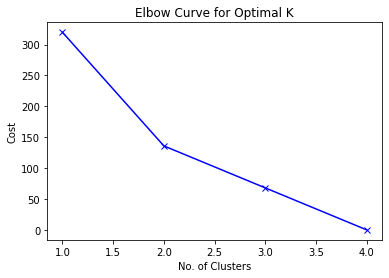

In [44]:
# Plotting the curve

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve for Optimal K')
plt.show()

In [45]:
#Building the model with 2 clusters as we can see a sharp bend in the curve
# at cluster value 2.0

kmode = KModes(n_clusters=2, init="random",n_init=5, verbose=1)
clusters = kmode.fit_predict(master_epidural_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 34, cost: 252.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 252.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 34, cost: 252.0
Run 3, iteration: 2/100, moves: 0, cost: 252.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 320.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 136.0
Best run was number 5


In [46]:
clusters

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,

In [47]:
# Append the predicted clusters with the dataframe

master_epidural_df.insert(4, "Predicted_Cluster", clusters, True)

In [50]:
master_epidural_df.head(15)

,Response_No,Response_YesForSomeDeliveries,Response_Yes,Reponse_YesForAllDeliveries,Predicted_Cluster
id,,,,,
195792,1,0,0,0,1
125192,0,1,0,0,0
125192,1,0,0,0,1
126365,1,0,0,0,1
130571,1,0,0,0,1
131845,0,1,0,0,0
131845,1,0,0,0,1
136102,0,1,0,0,0
136102,1,0,0,0,1


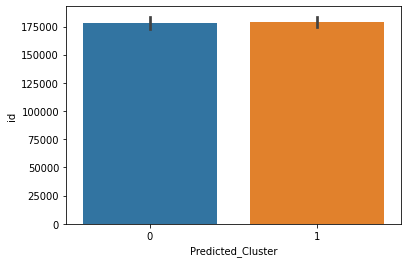

In [52]:
sns.barplot(x=master_epidural_df.Predicted_Cluster, y=master_epidural_df.index)

In [53]:
# We will now save this data for further visualization in Power BI

pathToSave = "/gdrive/MyDrive/Avegen_Data/quiz_epidural_clusters.csv"

In [54]:
master_epidural_df.to_csv(pathToSave)